In [50]:

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.mlab as math
import keras as keras

import pandas as pd




Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


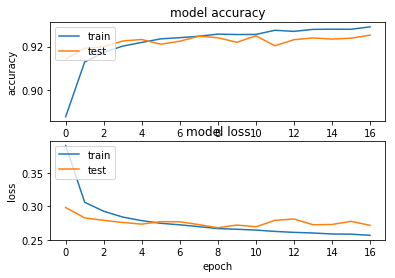

In [61]:
# 1A
from keras.optimizers import SGD
from keras.initializers import Zeros
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#############################
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

model = Sequential()
model.add(Dense(10, activation='softmax',use_bias=True, kernel_initializer=Zeros(),
                bias_initializer=Zeros() ,input_shape=(784,)))
model.summary()
model.compile(loss='categorical_crossentropy',
 optimizer=SGD(0.5),
 metrics=['accuracy'])

history = model.fit(train_data, train_labels_one_hot, batch_size=100, epochs=17, verbose=0, 
                   validation_data=(test_data, test_labels_one_hot),)

plt.gcf().clear()
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_89 (Dense)             (None, 1500)              2251500   
_________________________________________________________________
dense_90 (Dense)             (None, 1500)              2251500   
_________________________________________________________________
dense_91 (Dense)             (None, 10)                15010     
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 3s 261us/step
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


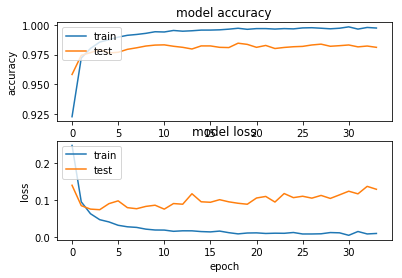

In [52]:
# 1B
# now in Keras (since it's easier to use 
# https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras.utils import to_categorical

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)


# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 

#-----------------------------------------------------------------------------------
#weights
weight1 = TruncatedNormal(mean=0.0, stddev=0.01)
weight1((784,1500))
weight2 = TruncatedNormal(mean=0.0, stddev=0.01)
weight2((1500,1500))
weight3 = TruncatedNormal(mean=0.0, stddev=0.01)
weight3((1500, 1500))
weight4 = TruncatedNormal(mean=0.0, stddev=0.01)
weight4((1500, 10))

#Network Creation
model = Sequential()
model.add(Dense(1500, activation='relu',use_bias=True, input_shape=(dimData,), kernel_initializer=weight1, bias_initializer=Constant(0.1)))
model.add(Dense(1500, activation='relu',use_bias=True, kernel_initializer=weight2, bias_initializer=Constant(0.1)))
model.add(Dense(1500, activation='relu',use_bias=True, kernel_initializer = weight3, bias_initializer=Constant(0.1)))
model.add(Dense(nClasses, activation='softmax',use_bias=True, kernel_initializer=weight4,bias_initializer=Constant(0.1)))
model.summary()

#implementing adam optimizer
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1*10**(-8), decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels_one_hot, batch_size=100, epochs=34, verbose=0, 
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

print(history.history.keys())  
plt.gcf().clear()
plt.figure(1)  
   
# summarize history for accuracy   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  



Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dropout_46 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_97 (Dense)             (None, 1500)              2251500   
_________________________________________________________________
dropout_47 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 1500)              2251500  

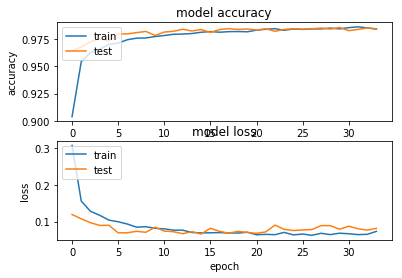

In [55]:
# 1C
# Dropout is the only real addition
# Our model will contain the dropout() statement

from keras.layers import Dropout
from keras.datasets import mnist


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')


# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

#-----------------------------------------------------------------------------------
weight1 = TruncatedNormal(mean=0.0, stddev=0.01)
weight1((784,1500))
weight2 = TruncatedNormal(mean=0.0, stddev=0.01)
weight2((1500,1500))
weight3 = TruncatedNormal(mean=0.0, stddev=0.01)
weight3((1500, 1500))
weight4 = TruncatedNormal(mean=0.0, stddev=0.01)
weight4((1500, 10))

model = Sequential()
model.add(Dense(1500, activation='relu',use_bias=True, input_shape=(dimData,), kernel_initializer=weight1, bias_initializer=Constant(0.1)))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu',use_bias=True, kernel_initializer=weight2, bias_initializer=Constant(0.1)))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu',use_bias=True, kernel_initializer = weight3, bias_initializer=Constant(0.1)))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax',use_bias=True, kernel_initializer=weight4,bias_initializer=Constant(0.1)))

model.summary()

#implementing adam optimizer
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1*10**(-8), decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, train_labels_one_hot, batch_size=100, epochs=34, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot),)


[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
#print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
plt.gcf().clear()
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 10)                31370     
Total params: 83,466
Trainable params: 83,466
Non-trainable params: 0

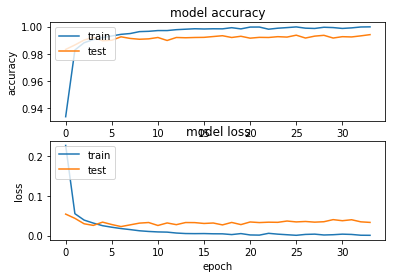

In [58]:
# 1D

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.initializers import TruncatedNormal,Constant,Zeros
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import SGD,Adam
# setting up of batch, and the number of classes and epochs

batch_size = 100
num_classes = 10
epochs = 34

# input image dimensions
img_x, img_y = 28, 28

# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1*10**(-8), decay=0.0)

model = Sequential()
model.add(Conv2D(32,(5,5),strides=(1, 1),padding='same', activation='relu',use_bias=True, bias_initializer=Constant(-0.1),input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(64,(5,5),strides=(1, 1),padding='same', activation='relu',use_bias=True, bias_initializer=Constant(-0.1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax',use_bias=True, bias_initializer=Constant(-0.1)))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])


history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_test, y_test))

#[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
#print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
plt.gcf().clear()
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [ ]:
#1e

Plots of the subtasks were shown below of every task.





In [62]:

from keras.layers import LSTM

#A
train_size = 8000
# np.random.seed(7)
dataset = np.random.randint(low=0, high=9+1, size=(10000,30))

def get_labels(dataset):
    sum = np.sum(dataset,1)
    sum[sum<100]=0
    sum[sum>=100]=1
    return sum


train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train_labels = np.reshape(get_labels(train),(-1,1))
test_labels = np.reshape(get_labels(test),(-1,1))
train = train[:,:,newaxis]
test = test[:,:,newaxis]
# print(train.shape)
# print(train.ndim)
# print(len(train), len(test))
#B 
timesteps=30
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(200, input_shape=(train.shape[1:])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

#D change epchos to 60
model.fit(train, train_labels, validation_data=(test, test_labels), epochs=60, batch_size=50)

#E
# Final evaluation of the model
scores = model.evaluate(test, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None
Train on 8000 samples, validate on 2000 samples
Epoch 1/60
8000/8000 [==============================] - 10s 1ms/step - loss: 0.0655 - acc: 0.9856 - val_loss: 0.0559 - val_acc: 0.9880
Epoch 2/60
8000/8000 [==============================] - 8s 991us/step - loss: 0.0478 - acc: 0.9866 - val_loss: 0.0468 - val_acc: 0.9895
Epoch 3/60
8000/8000 [==============================] - 8s 1ms/step - loss: 0.0379 - acc: 0.9874 - val_loss: 0.0312 - val_acc: 0.9880
Epoch 4/60
8000/8000 [==============================] - 8s 1ms/step - loss